In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [41]:
df=pd.read_csv('/content/heart.csv')
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [42]:
df.shape

(1025, 14)

In [43]:
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [85]:
#handing missing values
df['cp'].fillna(df['cp'].mean(), inplace=True)
df.head()

<ipython-input-85-5b928d34f05d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cp'].fillna(df['cp'].mean(), inplace=True)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,200,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [47]:
#distribution of dataset
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [80]:

# Create an outlier in the 'age' column
df.loc[0, 'age'] = 200   #Set the age of the first row to 200
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,200,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [86]:
print(df.duplicated().sum())

# Check for outliers using IQR method
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    return outliers

for column in df.select_dtypes(include=np.number):
    outliers = detect_outliers_iqr(df[column])
    if outliers:
        print(f"Outliers detected in '{column}': {outliers}")


# Check for inconsistencies in categorical variables
# Example: Check for unique values in 'sex' column
print(df['sex'].unique())

722
Outliers detected in 'age': [200]
Outliers detected in 'trestbps': [180, 178, 174, 180, 192, 200, 178, 192, 180, 200, 192, 172, 180, 174, 178, 180, 200, 180, 178, 180, 178, 174, 180, 200, 172, 180, 178, 178, 172, 180]
Outliers detected in 'chol': [417, 564, 409, 564, 394, 407, 564, 407, 394, 394, 409, 417, 407, 407, 417, 409]
Outliers detected in 'fbs': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Outliers detected in 'thalach': [71, 71, 71, 71]
Outliers detected in 'oldpeak': [5.6, 5.6, 6.2, 6.2, 6.2, 5.6, 5.6]
Outliers detected in 'ca': [3, 3, 3, 4, 3, 3, 3, 4, 4, 3, 3, 3,

<Figure size 1200x600 with 0 Axes>

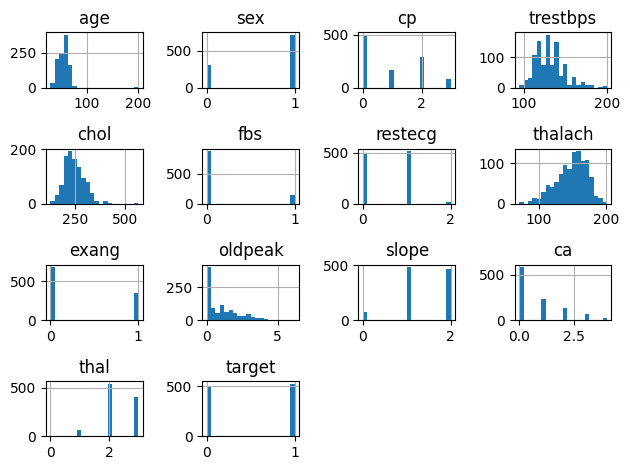

In [81]:
# Histograms
plt.figure(figsize=(12, 6))
df.hist(bins=20)
plt.tight_layout()
plt.show()


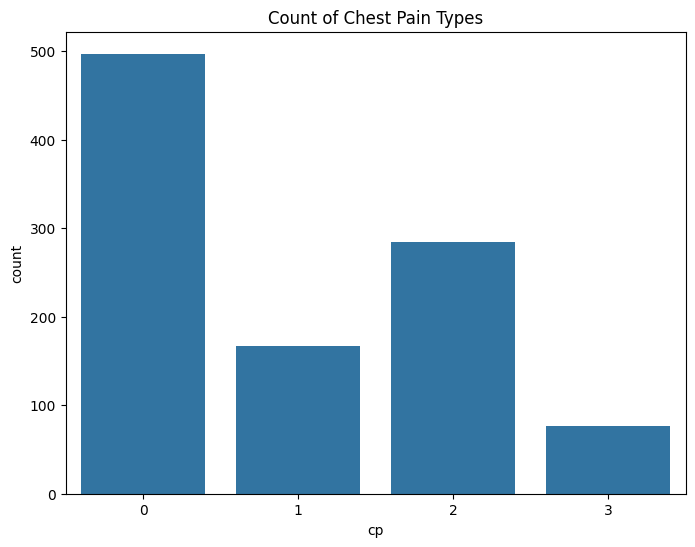

In [55]:
# Bar chart (e.g., count of different chest pain types)
plt.figure(figsize=(8, 6))
sns.countplot(x='cp', data=df)
plt.title("Count of Chest Pain Types")
plt.show()

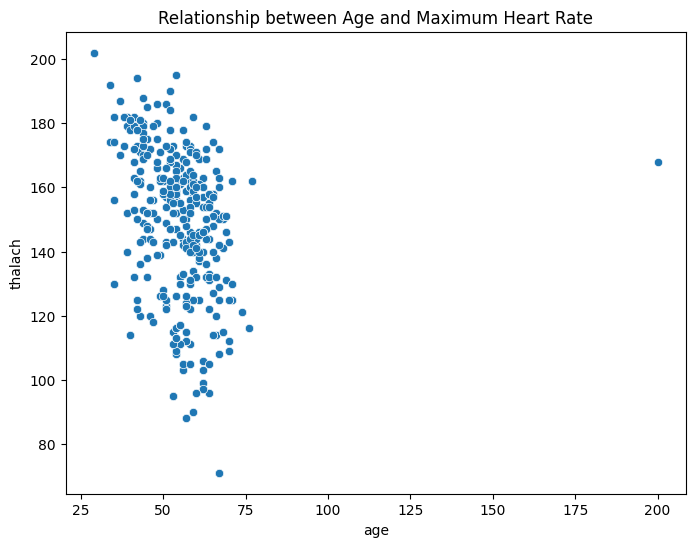

In [56]:

# Scatter plot (e.g., relationship between age and maximum heart rate)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='thalach', data=df)
plt.title("Relationship between Age and Maximum Heart Rate")
plt.show()

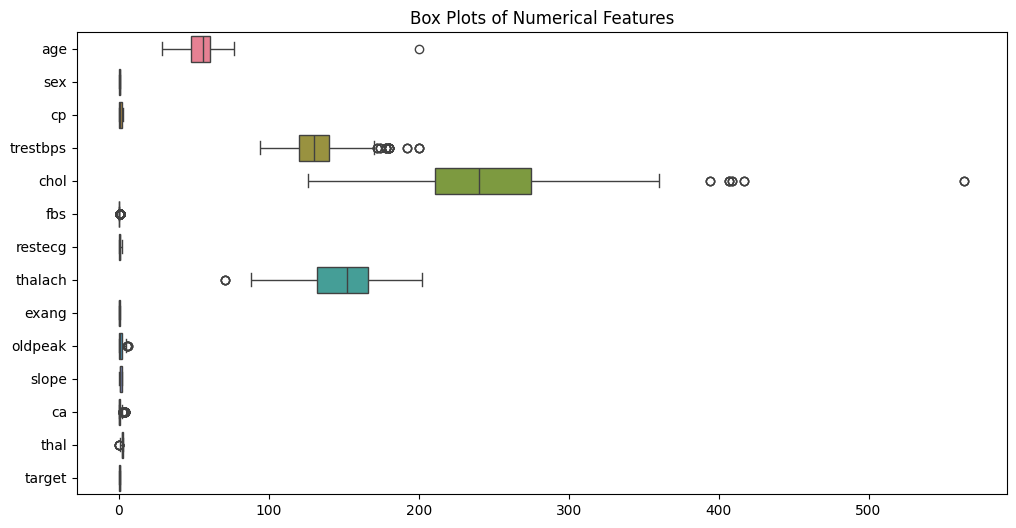

In [54]:
# Box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="h")
plt.title("Box Plots of Numerical Features")
plt.show()

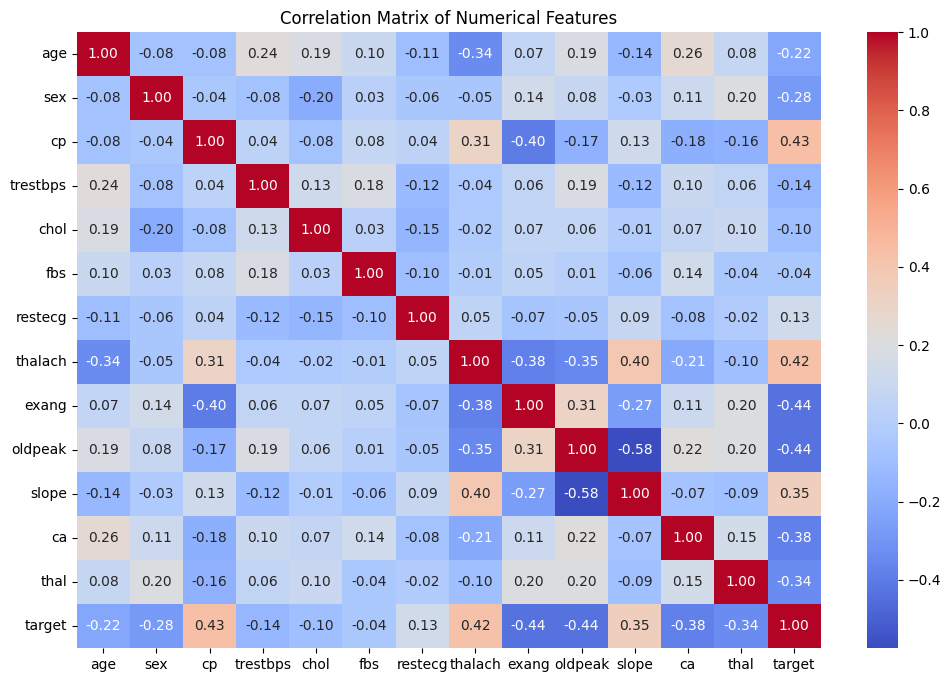

In [82]:
#relationship between variables
# Correlation Matrix
correlation_matrix = df.corr()

# Heatmap for visualizing correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()


In [74]:
# 1. Do you experience chest pain or discomfort?
# 1. What is the average age of individuals with heart disease compared to those without?
average_age_with_disease = df[df['target'] == 1]['age'].mean()
average_age_without_disease = df[df['target'] == 0]['age'].mean()
print(f"Average age with heart disease: {average_age_with_disease:.2f}")
print(f"Average age without heart disease: {average_age_without_disease:.2f}")


Average age with heart disease: 52.41
Average age without heart disease: 56.87


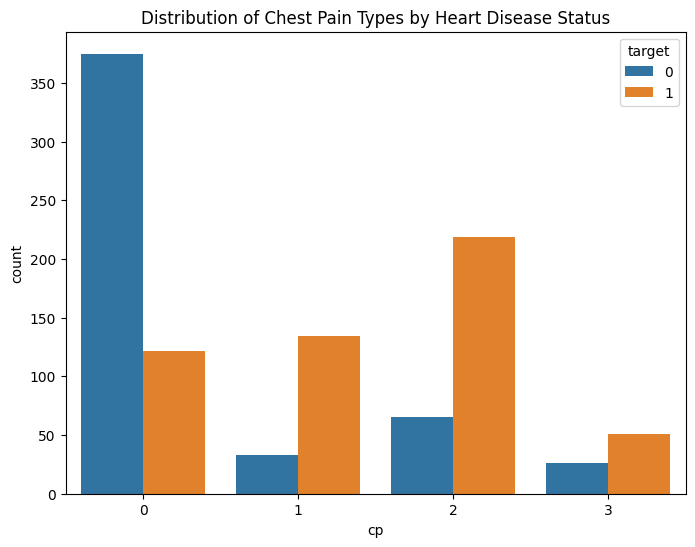

In [83]:
# 2. How does the distribution of chest pain types differ between individuals with and without heart disease?
# We can use a countplot or a grouped bar chart for this.
plt.figure(figsize=(8, 6))
sns.countplot(x='cp', hue='target', data=df)
plt.title("Distribution of Chest Pain Types by Heart Disease Status")
plt.show()



In [64]:
# 3. Is there a correlation between resting blood pressure and the presence of heart disease?
correlation_pressure_target = df['trestbps'].corr(df['target'])
print(f"Correlation between resting blood pressure and heart disease: {correlation_pressure_target:.2f}")
# You can also visualize this with a scatter plot or a heatmap.



Correlation between resting blood pressure and heart disease: -0.14


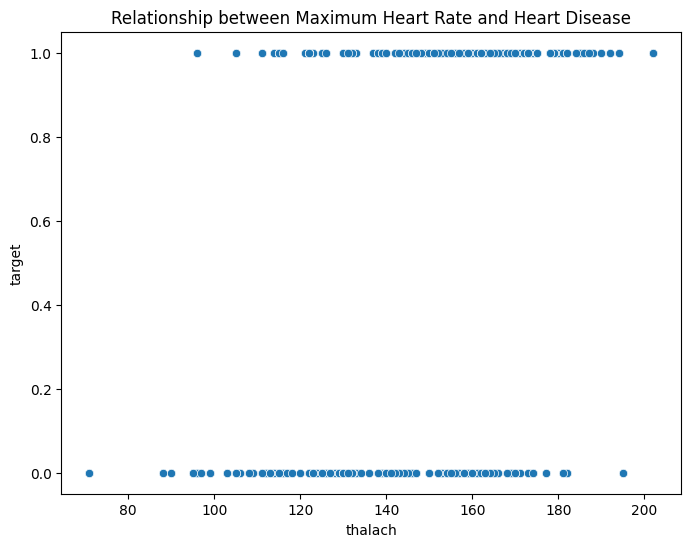

In [65]:
# 4. What is the relationship between maximum heart rate achieved and the presence of heart disease?
plt.figure(figsize=(8, 6))
sns.scatterplot(x='thalach', y='target', data=df)
plt.title("Relationship between Maximum Heart Rate and Heart Disease")
plt.show()
# You can calculate the correlation as well.


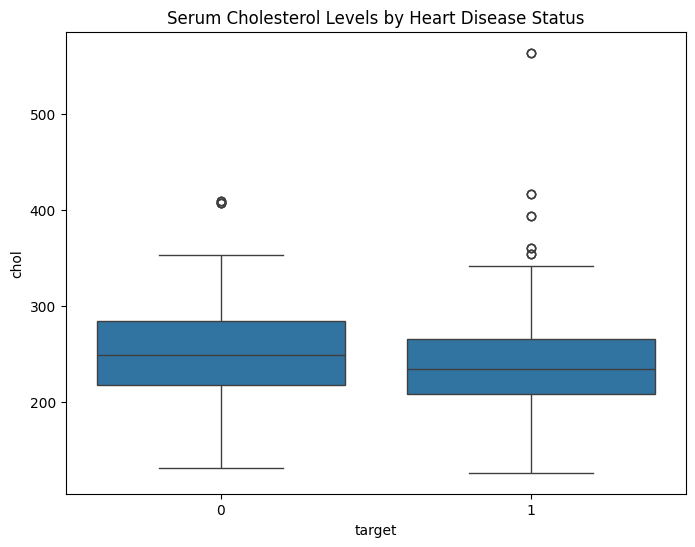

In [66]:
# 5. How does the serum cholesterol level vary between individuals with and without heart disease?
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='chol', data=df)
plt.title("Serum Cholesterol Levels by Heart Disease Status")
plt.show()


In [67]:

# 6. What is the percentage of individuals with heart disease who have exercise-induced angina?
exercise_angina_with_disease = df[(df['target'] == 1) & (df['exang'] == 1)].shape[0]
total_with_disease = df[df['target'] == 1].shape[0]
percentage = (exercise_angina_with_disease / total_with_disease) * 100 if total_with_disease > 0 else 0
print(f"Percentage of individuals with heart disease and exercise-induced angina: {percentage:.2f}%")

Percentage of individuals with heart disease and exercise-induced angina: 13.50%


In [68]:
# 7. What are the most significant features that are predictive of heart disease based on the correlation matrix?
# Review the correlation matrix and focus on the correlations between features and the target variable.
correlation_matrix = df.corr()
print(correlation_matrix['target'].sort_values(ascending=False))  # Sort by correlation with 'target'


target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.219640
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64


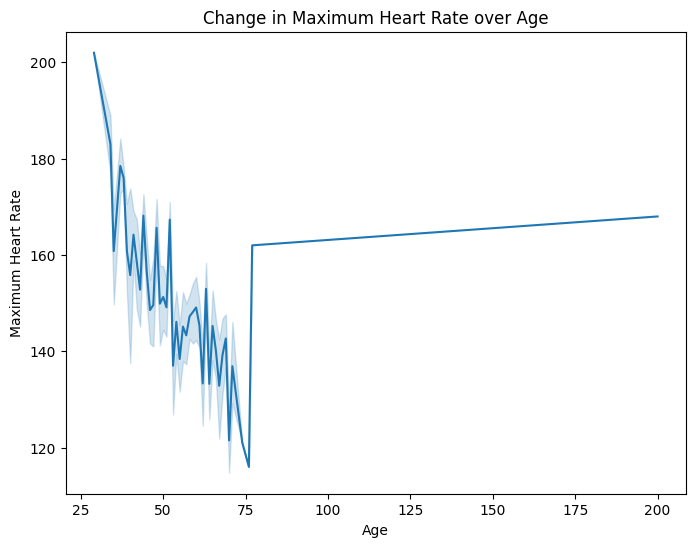

In [69]:

# Line plot (e.g., change in maximum heart rate over age)
plt.figure(figsize=(8, 6))
sns.lineplot(x='age', y='thalach', data=df)
plt.title("Change in Maximum Heart Rate over Age")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

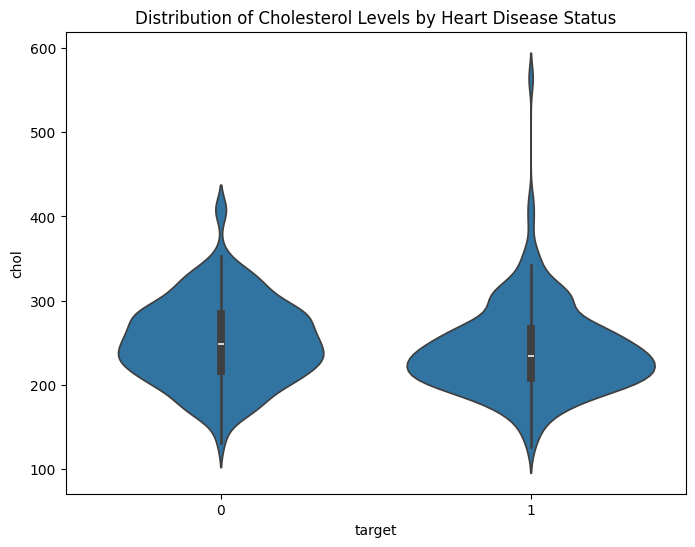

In [73]:
# Violin plot (e.g., distribution of cholesterol levels by target)
plt.figure(figsize=(8, 6))
sns.violinplot(x='target', y='chol', data=df)
plt.title("Distribution of Cholesterol Levels by Heart Disease Status")
plt.show()




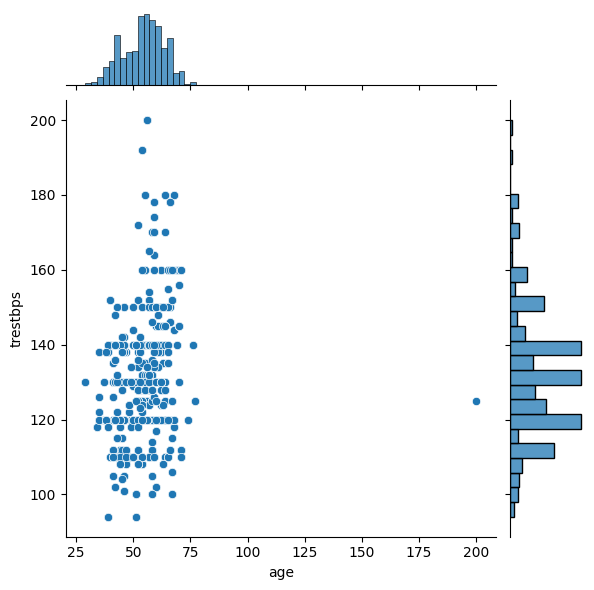

In [71]:
# Joint plot (e.g., relationship between age and resting blood pressure with marginal distributions)
sns.jointplot(x='age', y='trestbps', data=df, kind='scatter')
plt.show()


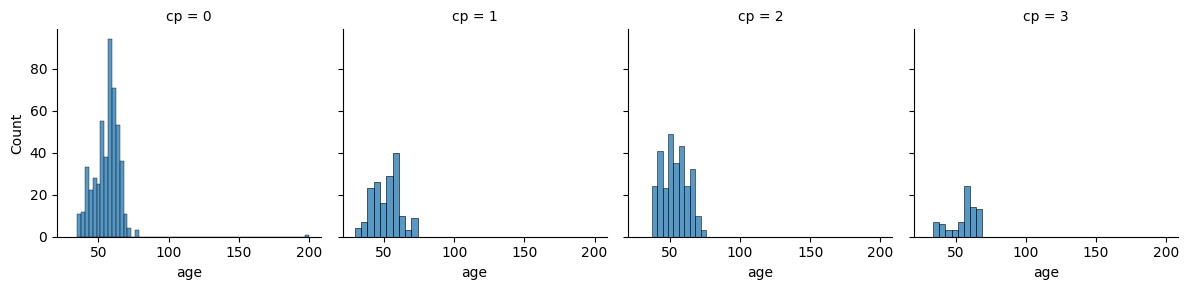

In [72]:
# Facet grid (e.g., visualize the distribution of age for different chest pain types)
g = sns.FacetGrid(df, col='cp')
g.map(sns.histplot, 'age')
plt.show()